<div style="border: 2px solid white; 
            border-radius: 15px; 
            background-color: coral; 
            color: white; 
            padding: 15px;
            text-align : center">
    <h1>Heart Disease Prediction</h1>
</div>>


Heart disease is a leading cause of mortality worldwide, emphasizing the need for effective prediction and diagnosis tools. This project focuses on developing a machine learning model to predict the presence of heart disease based on a subset of 14 critical attributes derived from the Cleveland Heart Disease dataset. The dataset, widely used in medical research, includes parameters such as age, sex, chest pain type, cholesterol levels, and more, enabling the identification of key factors contributing to heart disease. 

#### Description of the variables of dataset

1. Age (age): Patient's age in years.

2. Sex (sex): Gender of the patient.
    Values: 1 = Male, 0 = Female

3. Chest Pain Type (cp): Type of chest pain experienced.
    Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic

4. Resting Blood Pressure (trestbps): Blood pressure on admission in mm Hg.

5. Serum Cholesterol (chol): Serum cholesterol level in mg/dl.

6. Fasting Blood Sugar (fbs): Fasting blood sugar level.
    Values: 1 = >120 mg/dl, 0 = <=120 mg/dl

7. Resting Electrocardiographic Results (restecg): Results of resting  vcardiogram.
    alues: 0 = Normal, 1 = ST-T wave abnormality, 2 = Probable or definite left ventricular hypertrophy

8. Maximum Heart Rate Achieved (thalach): Maximum heart rate during examination.

9. Exercise-Induced Angina (exang): Presence of exercise-induced angina.
    Values: 1 = Yes, 0 = No

10. ST Depression Induced by Exercise Relative to Rest (oldpeak): ST depression induced by exercise relative to rest.

11. Slope of the Peak Exercise ST Segment (slope): Slope of the peak exercise ST segment.
    Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping

12. Number of Major Vessels Colored by Fluoroscopy (ca): Number of major vessels colored by fluoroscopy. A higher count may indicate a greater degree of vessel involvement or narrowing, which can be associated with more advanced stages of coronary artery disease.

13. Thalassemia (thal): Type of thalassemia.
    Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect

14. Diagnosis of Heart Disease (num): Diagnosis based on angiographic disease status.
    Values: 0 = < 50% diameter narrowing, 1 = > 50% diameter narrowing (in any major vessel)

## 1. Importing libraries and reading the dataset

In [ ]:
# importing the required libraries

!pip install jupyterthemes
!pip install xgboost
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [220]:
data = pd.read_csv("C:/Users/Shweta Reddy/Heart_Disease(1)/UCI_Heart_Disease_Dataset1.csv")
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [221]:
# Separating the 'Cleveland dataset' 
other_dataset = data['dataset'] != 'Cleveland' 
cleveland_data =data[~other_dataset]
cleveland_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 2. Dataset Overview

 * #### Display a concise summary of the dataframe

In [222]:
cleveland_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        304 non-null    int64  
 1   age       304 non-null    int64  
 2   sex       304 non-null    object 
 3   dataset   304 non-null    object 
 4   cp        304 non-null    object 
 5   trestbps  304 non-null    float64
 6   chol      304 non-null    float64
 7   fbs       304 non-null    object 
 8   restecg   304 non-null    object 
 9   thalch    304 non-null    float64
 10  exang     304 non-null    object 
 11  oldpeak   304 non-null    float64
 12  slope     303 non-null    object 
 13  ca        299 non-null    float64
 14  thal      301 non-null    object 
 15  num       304 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 40.4+ KB


***Conclusion :***<br>
*Number of Entries:*  The dataset consists of 304 entries, ranging from index 0 to 303. <br>
*Columns:*  There are 16 columns in the dataset corresponding to various attributes of the patients and results of tests. <br>
*Data Types:*  The columns are of int64, object and float datatypes.<br>
*Missing Values:*  There appears to be null values in the 'slope', 'ca', 'thal' and 'num' columns.
tries.

 * #### Dropping unwanted columns

In [223]:
cleveland_data.drop(columns=['id', 'dataset'], inplace=True)

*Unwanted columns id and dataset are dropped sucessfully*

* #### Renaming the columns for better understanding

In [224]:
# Define a dictionary with the new column names
new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBloodPressure',
    'chol': 'SerumCholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalch': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'SlopeSTSegment',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'num': 'HeartDiseaseDiagnosis'
}

# Rename the columns using the dictionary
cleveland_data.rename(columns=new_column_names, inplace=True)

* ####  Dropping null values and changing datatype of columns

In [225]:
cleveland_data.dropna(axis=0, inplace=True)  # Drop rows with null values
cleveland_data.reset_index(drop=True, inplace=True)  # Reset the index

# Convert selected columns to int64
cleveland_data[['Age', 'RestingBloodPressure', 'SerumCholesterol', 'MaxHeartRate', 'NumMajorVessels', 'HeartDiseaseDiagnosis']] = cleveland_data[['Age', 'RestingBloodPressure', 'SerumCholesterol', 'MaxHeartRate', 'NumMajorVessels', 'HeartDiseaseDiagnosis']].astype('int64')

# colverting selected columns to Category
cleveland_data[['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'SlopeSTSegment', 'Thalassemia']] = cleveland_data[['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'SlopeSTSegment', 'Thalassemia']].astype('category')

cleveland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    297 non-null    int64   
 1   Sex                    297 non-null    category
 2   ChestPainType          297 non-null    category
 3   RestingBloodPressure   297 non-null    int64   
 4   SerumCholesterol       297 non-null    int64   
 5   FastingBloodSugar      297 non-null    category
 6   RestingECG             297 non-null    category
 7   MaxHeartRate           297 non-null    int64   
 8   ExerciseInducedAngina  297 non-null    category
 9   STDepression           297 non-null    float64 
 10  SlopeSTSegment         297 non-null    category
 11  NumMajorVessels        297 non-null    int64   
 12  Thalassemia            297 non-null    category
 13  HeartDiseaseDiagnosis  297 non-null    int64   
dtypes: category(7), float64(1), int64(6)
memor

**Conclusion:**<br>
*Rows with null values are dropped and datatypes of the columns are also updated.*

 * #### Get the summary statistics for numerical variables

In [226]:
cleveland_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
RestingBloodPressure,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
SerumCholesterol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
MaxHeartRate,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
STDepression,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
NumMajorVessels,297.0,0.676768,0.938965,0.0,0.0,0.0,1.0,3.0
HeartDiseaseDiagnosis,297.0,0.946128,1.234551,0.0,0.0,0.0,2.0,4.0


***Conclusion :***<br>
*Age:*  The average age of the patients is approximately 54.54 years, with the youngest being 29 and the oldest 77 years.<br>
*RestingBloodPressure:*  The average resting blood pressure is about 131.69 mm Hg, ranging from 94 to 200 mm Hg.<br>
*SerumCholesterol:*  The average cholesterol level is approximately 247.35 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.<br>
*MaxHeartRate:*  The average maximum heart rate achieved is around 149.59, with a range from 71 to 202.<br>
*STDepression:*  The average ST depression induced by exercise relative to rest is about 1.05, with values ranging from 0 to 6.2.

 * #### Get the summary statistics for categorical variables

In [227]:
cleveland_data.describe(include=['category']).T


,count,unique,top,freq
Sex,297,2,Male,201
ChestPainType,297,4,asymptomatic,142
FastingBloodSugar,297,2,False,254
RestingECG,297,3,normal,147
ExerciseInducedAngina,297,2,False,200
SlopeSTSegment,297,3,upsloping,139
Thalassemia,297,3,normal,164


## 3. Exploratory Data Analysis

* #### Frequency of Numerical columns

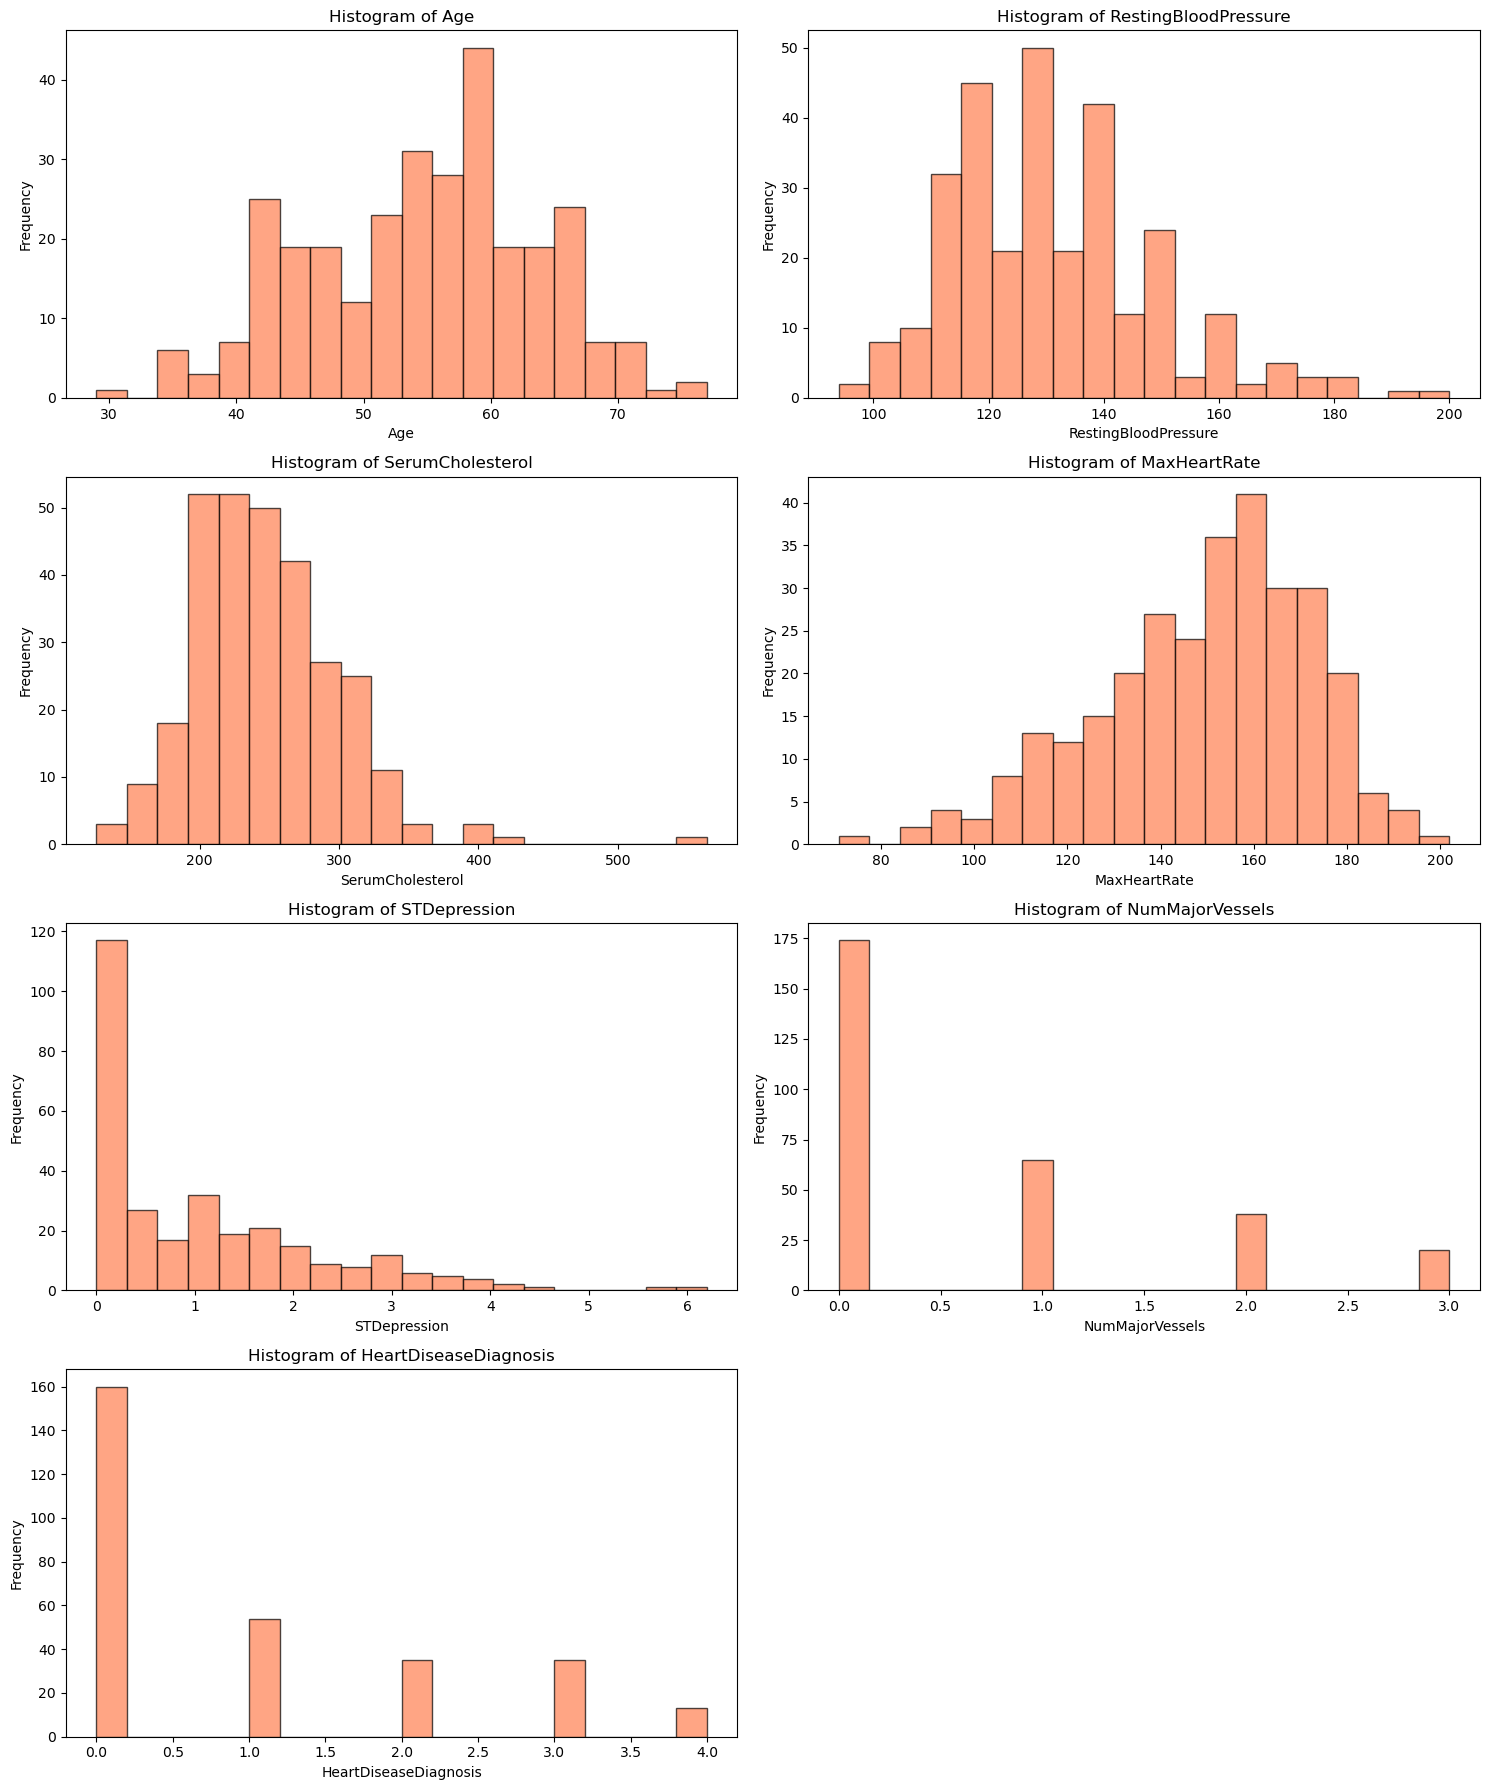

In [228]:
# Select only numerical columns
numerical_columns = cleveland_data.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure size
plt.figure(figsize=(15, 18))

# Plot histograms for all numerical columns
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 2, i + 1)  # Adjust the number of rows and columns if needed
    cleveland_data[column].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7,color = 'coral')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

**Conclusions :**

**Histogram of age :** It depicsts that majority of people are between the age of 40 - 70, where very few people are below 30.<br>
**Histogram of RestingBloodPressure :** It shows that a big crowd of people have elevated Resting Blood Pressure.<br>
**Histogram of SerumCholerestrol :** It shows that large number of people have high level of serum cholestrol with few being the heighest.<br>
**Histogram of NumMajorVessels :** : It shows that people can be grouped into 4 categories based on the number of blood vessels blocked in them, where majority of people belonging to 0 vessels blocked followed by 1, 2 and 3.<br>
**Histogram of HeartDiseaseDiagnosis :** It shows that there is unnecesssary grouping of patients based on the presence of Heart Disease. It must only contain 0 - for absense of heart disease and 1 - for presence of heart disease. Therefore the values greater than 0 needs to be grouped into a single category i.e 1 (presense of heart disease). 

* #### Binarization of HeartDiseaseDiagnosis column

In [229]:
cleveland_data['HeartDiseaseDiagnosis'] = np.where(cleveland_data['HeartDiseaseDiagnosis'] > 0, 1, cleveland_data['HeartDiseaseDiagnosis'])
cleveland_data['HeartDiseaseDiagnosis'].unique()

array([0, 1], dtype=int64)

* ### Proportion of People Diagnosed with Heart Disease

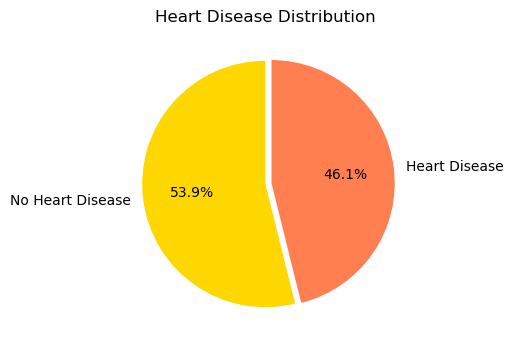

In [230]:
plt.figure(figsize = (4,4))
labels = ['No Heart Disease', 'Heart Disease']
affected = cleveland_data[cleveland_data['HeartDiseaseDiagnosis'] == 1]
affected = cleveland_data['HeartDiseaseDiagnosis'].value_counts()
colors = ['gold', 'coral']
plt.pie(affected, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,explode = (0,0.05))
plt.title('Heart Disease Distribution')
plt.show()

* ### Heart Disease distribution by gender

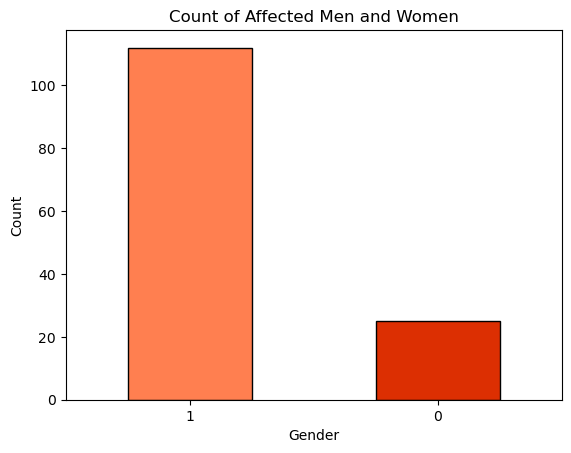

In [246]:
# Filter data for affected individuals (heart disease diagnosis = 1)
affected = cleveland_data[cleveland_data['HeartDiseaseDiagnosis'] == 1]
# Count of affected men and women
counts = affected['Sex'].value_counts()
# Plot the bar chart
counts.plot(kind='bar', edgecolor='black',color = ['coral','#dc2f02'])
plt.title('Count of Affected Men and Women')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

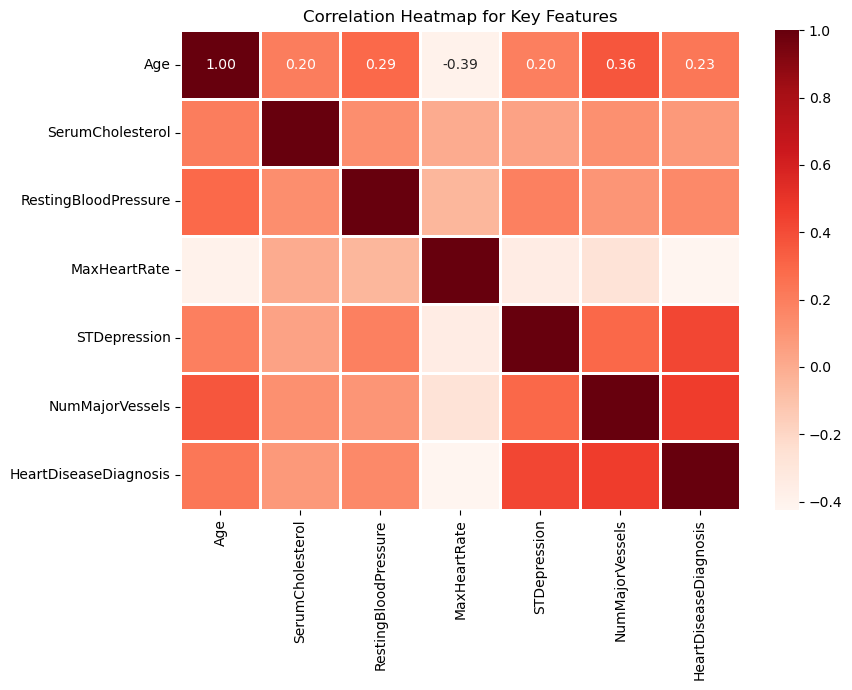

In [232]:
# Select a subset of relevant features
selected_features = cleveland_data[['Age', 'SerumCholesterol', 'RestingBloodPressure', 'MaxHeartRate', 'STDepression','NumMajorVessels','HeartDiseaseDiagnosis']]

# Correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(selected_features.corr(), annot=True,linewidth = 2 ,cmap='Reds', fmt='.2f',annot_kws={'size': 10})
plt.title('Correlation Heatmap for Key Features', fontsize=12)
plt.tight_layout()
plt.show()


* ### HeartDiseaseDiagnosis by chestpain

Text(0, 0.5, 'Number of People')

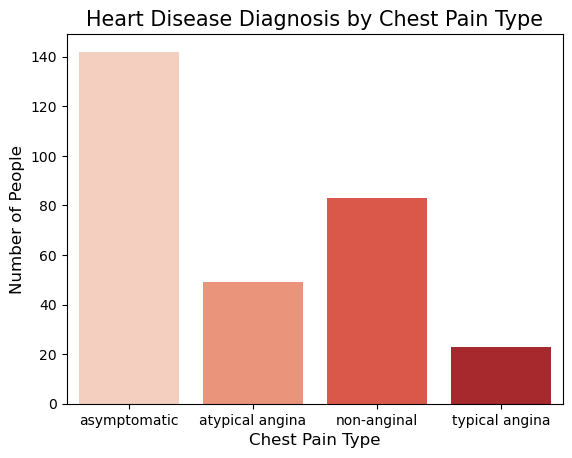

In [233]:
# Filter the data for people affected by heart disease (target = 1)
heart_disease_data = cleveland_data[cleveland_data['HeartDiseaseDiagnosis'] == 1]

# Group by the chest pain type and count the number of people in each category
chest_pain_counts = cleveland_data['ChestPainType'].value_counts()

# Create a bar chart to show the number of people with heart disease for each chest pain type
sns.barplot(x=chest_pain_counts.index, y=chest_pain_counts.values, palette='Reds')

# Adding titles and labels
plt.title('Heart Disease Diagnosis by Chest Pain Type',fontsize = 15)
plt.xlabel('Chest Pain Type',fontsize = 12)
plt.ylabel('Number of People',fontsize = 12)

* ### HeartDiseaseDiagnosis by Thalassemia

Text(0, 0.5, 'Number of People')

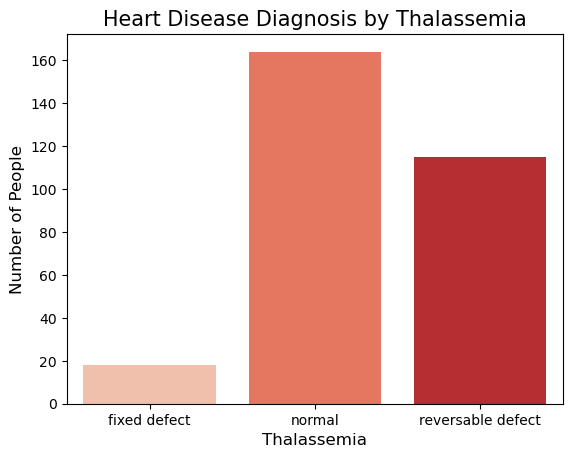

In [236]:
# Filter the data for people affected by heart disease (target = 1)
heart_disease_data = cleveland_data[cleveland_data['HeartDiseaseDiagnosis'] == 1]

# Group by the chest pain type and count the number of people in each category
Thalassemia_count = cleveland_data['Thalassemia'].value_counts()

# Create a bar chart to show the number of people with heart disease for each chest pain type
sns.barplot(x=Thalassemia_count.index, y=Thalassemia_count.values, palette='Reds')

# Adding titles and labels
plt.title('Heart Disease Diagnosis by Thalassemia',fontsize = 15)
plt.xlabel('Thalassemia',fontsize = 12)
plt.ylabel('Number of People',fontsize = 12)

## 4. Mapping Values

In [245]:
# 'FastingBloodSugar' values
cleveland_data['FastingBloodSugar'] = cleveland_data['FastingBloodSugar'].replace({True : 1,False:0})

# 'ExerciseInducedAngina'
cleveland_data['ExerciseInducedAngina'] = cleveland_data['ExerciseInducedAngina'].replace({True : 1,False:0})

# 'Sex'
cleveland_data['Sex'] = cleveland_data['Sex'].replace({'Male' : 1,'Female':0})

# 'ChestPainType'
cleveland_data['ChestPainType'] = cleveland_data['ChestPainType'].replace({'typical angina':1,'atypical angina':2,'non-anginal':3,'asymptomatic':4})

# 'RestingECG'
cleveland_data['RestingECG'] = cleveland_data['RestingECG'].replace({'lv hypertrophy':2,'normal':0,'st-t abnormality':1})

# 'SlopeSTSegment'
cleveland_data['SlopeSTSegment'] = cleveland_data['SlopeSTSegment'].replace({'upsloping':1,'downsloping':3,'flat':2})

# 'Thalassemia'
cleveland_data['Thalassemia'] = cleveland_data['Thalassemia'].replace({'normal':3,'fixed defect':6,'reversable defect':7})

# Replace values >= 120 with 1, and values < 120 with 0
cleveland_data['FastingBloodSugar'] = cleveland_data['FastingBloodSugar'].apply(lambda x: 1 if x >= 120 else 0)

# Printing the dataset
cleveland_data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,HeartDiseaseDiagnosis
0,63,1,1,145,233,0,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## 5. Splitting dataset

In [251]:
# Separating the target and parameter columns
y = cleveland_data['HeartDiseaseDiagnosis']
X = cleveland_data.drop(columns = ['HeartDiseaseDiagnosis'])

# Splitting into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting temp into test (20%) and val (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (297, 13)
Shape of y (297,)
